In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.3.0 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:        0.19.0 (need at least 0.12.0)
Pandas version:       0.20.1 (need at least 0.11.0)
Mapltolib version:     2.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


## Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print(flights_df.shape) 
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
flightSEA = flights_df.query("dest=='SEA'") # select flights with dest == 'SEA'
flightSEA.shape

(3923, 17)

There are 3923 flights from NYC airport to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [7]:
flightSEA.carrier.unique() #distinct carriers in all flights to Seattle

array(['AS', 'DL', 'UA', 'B6', 'AA'], dtype=object)

There are 5 airlines from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
len(flightSEA.tailnum.unique())# number of distinct tailnum

936

There are 936 unique air plains fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
round(flightSEA.arr_delay.mean(),3) # average delay time

-1.099

The average arrival delay for flights from NYC to Seattle is about -1.099.

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
(pd.DataFrame(flightSEA.groupby(flightSEA['origin'])
    .size() # calculate count of flights departing from each airport
    .rename('total'))# group by origin
    .assign(prop=lambda x: round(x.total/sum(x.total), 2))) #calculate proportion

,total,prop
origin,,
EWR,1831,0.47
JFK,2092,0.53


46.67% of the flights to Seattle in 2013 originated at EWR and 53.33% of flights originated at
JFK.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
delayAvg = flights_df.groupby(['month', 'day'])[['dep_delay', 'arr_delay']].mean() # group by month and day and aggregate by mean
print(delayAvg[delayAvg.dep_delay == max(delayAvg.dep_delay)]) # max departure delay date
print(delayAvg[delayAvg.arr_delay == max(delayAvg.arr_delay)]) # max arrival delay date

           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155
           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155


Both of largest average departure and arrival delay occurred in March 8th, 2013. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
gp =pd.DataFrame(flights_df['dep_delay'].groupby(flights_df['day']).mean()) # group by day, aggregate by mean, convert to dataframe
gp.reset_index(inplace=True) #reset index
print(gp.sort_values('dep_delay',ascending=False).iloc[0]) # sort by delay

day           8.000000
dep_delay    21.760773
Name: 7, dtype: float64


With respect to the largest average departure delay in 2013, 8th is the worst day to depart NYC.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

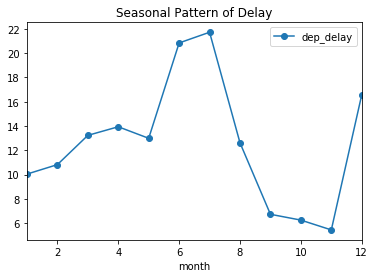

In [13]:
month_df = pd.DataFrame(flights_df.groupby('month')['dep_delay'].mean()) # group by month, aggregate dep_delay by mean
month_df.reset_index(inplace=True)
month_df.plot(x='month', y='dep_delay', linestyle='-', marker='o', title="Seasonal Pattern of Delay") # plot month vs dep_delay
plt.show()

In general, the average departure delay peaks in summer (Jun and Jul) and then decreases until Nov. There is a sudden increase in December, after that it falls down back and then increases smoothly.

(d) On average, how do departure delays vary over the course of a day?

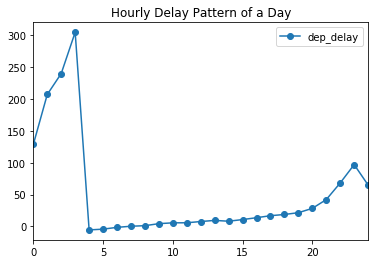

In [14]:
hour_df = pd.DataFrame(flights_df.groupby('hour')['dep_delay'].mean())# return a dataframe
hour_df.reset_index(inplace=True) # reset index
hour_df.plot(linestyle='-', marker='o', y='dep_delay', title="Hourly Delay Pattern of a Day") # plot hour vs dep_delay
plt.show()

Over the course of a day, the peak of depature delay happens around 3 o'clock. It then has a sudden drop to normal at 4. From 4 to 20 o'clock, the depature delay is smoothly increasing and after 20, it continues to rise at a greater speed. 

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [15]:
# add a new column of speed
flights_df['speed'] = flights_df['distance']/flights_df['air_time']
print(flights_df[flights_df['speed'] == max(flights_df['speed'])])

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute      speed  
216447  17.0     9.0  11.723077  


The flight N666DN flew the fastest in 2013.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
# group by carrier, flight and dest
# aggregate by count
df =pd.DataFrame(flights_df.groupby(['carrier', 'flight', 'dest']).size().rename('total'))
print(df[df.total==365]) 

                     total
carrier flight dest       
AA      59     SFO     365
        119    LAX     365
        181    LAX     365
        1357   SJU     365
        1611   MIA     365
B6      219    CLT     365
        359    BUR     365
        371    FLL     365
        431    SRQ     365
        703    SJU     365
        1783   MCO     365
DL      2159   MCO     365
        2391   TPA     365
EV      5712   IAD     365
UA      15     HNL     365
VX      251    LAS     365
        407    LAX     365
        413    LAX     365


There are a total of 18 flights that happened everyday in 2013. They are from different carriers including AA, B6, DL, EV, UA and VX and arrived in various destination including LAX, SJU, MIA, etc.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Research Question: whether the total number of departure flights on a daily basis is associated with the average daily departure delay and if such association exists in all three NYC airports.
The research question takes an assupmtion that more flights departure on a day led to higher average departure. So we firstly examined how the total number of departure flights varies in the three airports. As the first chart shows, in general EWR has more flights to handle than JFK and LGA, which means given the assumption is true, EWR is more subject to departure delay than JFK and LGA. We then examined the daily average departure delay in these three airports and based on second chart, we found that the departure delay of EWR is slightly higher than JFK and LGA. We finally looked at how the total number of departure flights is associated with daily average departure delay. In the last chart, we saw the trend that more departure flights resulted in higher average departure delay.   

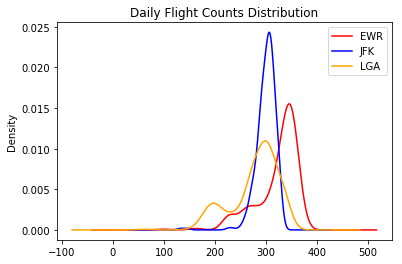

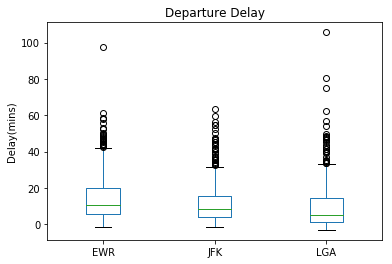

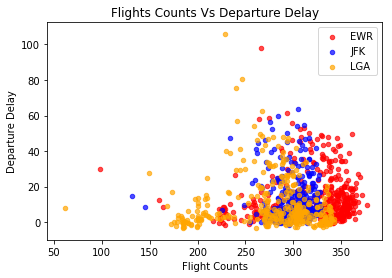

In [17]:
# EWR daily departure flights total mumber and dep_delay 
flight_EWR = flights_df.query("origin=='EWR'").groupby(['month', 'day']).agg(['count', 'mean'])['dep_delay']
flight_EWR.reset_index(inplace=True)
# JFK daily departure flights total mumber and dep_delay 
flight_JFK = flights_df.query("origin=='JFK'").groupby(['month', 'day']).agg(['count', 'mean'])['dep_delay']
flight_JFK.reset_index(inplace=True)
# LGA daily departure flights total mumber and dep_delay 
flight_LGA = flights_df.query("origin=='LGA'").groupby(['month', 'day']).agg(['count', 'mean'])['dep_delay']
flight_LGA.reset_index(inplace=True)
fig = plt.figure()
flight_EWR['count'].plot.density(color="red", label="EWR")
flight_JFK['count'].plot.density(color="blue", label="JFK")
flight_LGA['count'].plot.density(color="orange", label="LGA")
plt.legend()
plt.title("Daily Flight Counts Distribution")
plt.show()
pd.DataFrame({"EWR": flight_EWR['mean'], "JFK": flight_JFK['mean'], "LGA": flight_LGA['mean']}).plot.box()
plt.ylabel("Delay(mins)")
plt.title("Departure Delay")
plt.show()
ax = flight_EWR.plot.scatter(x='count', y='mean', color="red", alpha=0.7, label="EWR")
flight_JFK.plot.scatter(x='count', y='mean', color="blue", label="JFK", alpha=0.7, ax=ax)
flight_LGA.plot.scatter(x='count', y='mean', color="orange", label="LGA", alpha=0.7, ax=ax)
plt.legend()
plt.title("Flights Counts Vs Departure Delay")
plt.xlabel("Flight Counts")
plt.ylabel("Departure Delay")
plt.show()

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [18]:
weather = pd.read_csv('weather.csv', index_col=0) # lead weather data
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8719 entries, 1 to 8719
Data columns (total 14 columns):
origin        8719 non-null object
year          8719 non-null int64
month         8718 non-null float64
day           8718 non-null float64
hour          8718 non-null float64
temp          8718 non-null float64
dewp          8718 non-null float64
humid         8718 non-null float64
wind_dir      8486 non-null float64
wind_speed    8718 non-null float64
wind_gust     8718 non-null float64
precip        8719 non-null float64
pressure      7780 non-null float64
visib         8719 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1021.8+ KB


Weather Data Entries Origin:

year    2013
origin      
EWR     8709
JFK        9
LGA        1


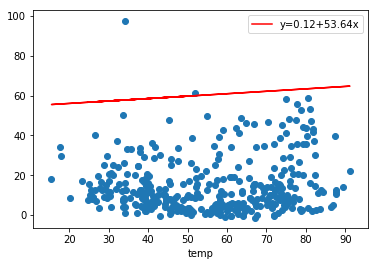

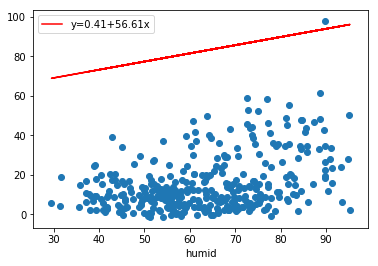

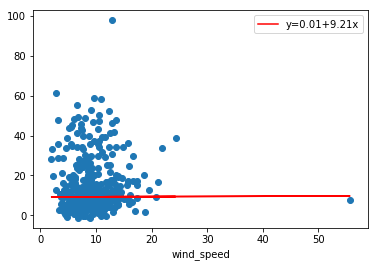

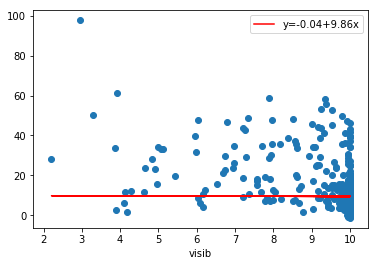

In [19]:
from sklearn.linear_model import LinearRegression
print('Weather Data Entries Origin:\n')
print(pd.crosstab(weather.origin, weather.year)) # weather data is mostly collected at EWR
EWR_flights =pd.DataFrame(flights_df[flights_df.origin=='EWR'].groupby(['month', 'day'])['dep_delay'].agg('mean'))# EWR flights group by month and day, aggregate dep_delay by mean
EWR_flights.reset_index(inplace=True)
EWR_flights['month'] = EWR_flights['month'].astype(float)#convert month to float
EWR_flights['day']= EWR_flights['day'].astype(float)#convert day to float
var = ['temp', 'humid', 'wind_speed', 'visib']
EWR_weather = weather[weather['origin']=='EWR'].groupby(['month', 'day'])[var].agg('mean') #EWR flights group by month and day, aggregate weather variables by mean
EWR_weather.reset_index(inplace=True)
EWR_combined = EWR_flights.merge(EWR_weather, on = ['month', 'day'])# merge two dataframes

for item in var:
    lr = LinearRegression()
    lr.fit(EWR_combined['dep_delay'].values.reshape(-1,1), EWR_combined[item])
    alpha, beta = lr.coef_, lr.intercept_
    fig = plt.figure()
    X = EWR_combined[item]
    plt.plot(X, beta+alpha*X, 'r-', label="y=%.2f+%.2fx"%(alpha,beta))
    plt.xlabel(item)
    plt.legend()
    plt.scatter(x=EWR_combined[item], y=EWR_combined['dep_delay'])# plot weather condition vs average departure delay
    plt.show()


As regards to how weather condition is associated with depature deplay, we took the impact of temperature, humidity, wind speed and visibility into consideration. Specifically, we explored and visualized how the daily average temperature, humidity, wind speed and visibility are respectively associated with the average daily departure delay. The visualization suggests that temperature and humidity are positively correlated with departure delay with a small coefficient (there are outliers that impacted the regression line). However, for wind speed and visibility the simple linear regression may not be a good fit.